# 指南者留学背景提升线上课程项目训练
## 项目: 顺丰快递自动化机器人分拣系统


恭喜大家进入到此训练营的最后一个环节！在这个文件中，部分的模版代码已经写好啦，但你还需要补充一些功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！


- **项目背景**：互联网时代涌现出越来越多的快递企业，快递行业之间的竞争也越来越激烈。在各大企业的服务质量达到不相上下的程度之后，快递业的竞争也回归到最原始的时效性竞争，只有更快的时效性才能成为快递行业的领头羊。人工分拣速度的缓慢，是影响快递时效性的最重要的因素，随着人工智能的高速发展，自动化分拣机器人在快递企业得到了广泛的应用。以往的快递分拣和入库需要人工操作，速度十分缓慢，出错也是不可避免的问题，基于人工智能的自动分拣机器人在分拣的速度上得到了很大的提升，并且出错率比起人工分拣也大大降低，大大提高了生产效率。


- **项目任务**：我们使用24个传感器对顺丰自动分拣机器人进行数据采集，得到机器人运动数据。基于此数据使用机器学习的方法，进行特征工程处理得到有效信息数据搭建机器学习智能预测系统来控制机器人的动作达到自动分拣的功能。
- **项目步骤**：    
                        1. 数据的探索与问题分析；
                            a.查看数据集
                            b.查看缺失与重复
                        2. 清洗数据；
                            a.查看标签分布；
                            b.标签转换；
                        3. 特征工程；
                            a.连续特征离散化；
                            b.特征过滤；
                        4. 选择模型进行交叉验证和网格搜索；
                        5. 模型的集成；
                        6. 模型评价的深入思考。                     

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

>**注意：**如果有未安装的库，请使用 `pip install`,`conda install`命令进行安装

---
## 项目之前的思考

> 在本项目开始之前，请仔细阅读并完成以下问题，带着问题继续下面的项目。
  
    
**问题1：** 不同算法的可伸缩性不同，请列举出我们课上讲过的模型中，需要在建模前进行去量纲操作的全部模型。 

**回答：** 

**问题2：** 特征过滤包括哪些方式，请一一举例说明。 

**回答：** 1.过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
        2. 使差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。使用feature_selection库的VarianceThreshold类选择特征
        3. 卡方检验
    
**问题3：** 这种看似简单的沿墙导航任务其实是一种非线性可分的分类任务，请列举所有课上讲过的适合解决此类任务的模型。 

**回答：** 1. RandomForestClassifier
        2. DecisionTreeClassifier
        
        
**问题4：** 对于这种多分类问题，你认为在评价模型表现时，应评价模型整体表现还是对每种分类单独评价，为什么？ 

**回答：** 

In [1]:
# 请不要修改此格代码
# 导入依赖库
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#加载数据
namelist=[]
for no in range(24):
    name='US'+str(no)
    locals()['US'+str(no)]=no
    namelist.append(name)
namelist.append('Class')
data1 = pd.read_csv('sensor_readings_24.data',header=None,names=namelist)
data2 = pd.read_csv('sensor_readings_4.data',header=None,names=['SD_front','SD_left','SD_right','SD_back','Class'])
col_name= list(data1.iloc[:,:-1].columns)+list(data2.iloc[:,1:].columns)
#查看数据的特征
print('训练集的特征：{}\n'.format(col_name))
#查看数据的标签
print('训练集的特征：{}\n'.format(list(data1[['Class']].columns)))
#查看数据的shape
print('训练集的形状：{},{}'.format(data1.shape,data2.shape))

训练集的特征：['US0', 'US1', 'US2', 'US3', 'US4', 'US5', 'US6', 'US7', 'US8', 'US9', 'US10', 'US11', 'US12', 'US13', 'US14', 'US15', 'US16', 'US17', 'US18', 'US19', 'US20', 'US21', 'US22', 'US23', 'SD_left', 'SD_right', 'SD_back', 'Class']

训练集的特征：['Class']

训练集的形状：(5456, 25),(5456, 5)


## 1.数据探索和问题分析
### 编程练习
将data1和data2进行合并，命名为data，注意两个数据集中的Class这一列仅需保留一个

In [2]:
data1 = pd.read_csv('sensor_readings_24.data',header=None,names=namelist)
data1

,US0,US1,US2,US3,US4,US5,US6,US7,US8,US9,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [3]:
data2 = pd.read_csv('sensor_readings_4.data',header=None,names=['SD_front','SD_left','SD_right','SD_back','Class'])
data2

,SD_front,SD_left,SD_right,SD_back,Class
0,1.687,0.445,2.332,0.429,Slight-Right-Turn
1,1.687,0.449,2.332,0.429,Slight-Right-Turn
2,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,1.687,0.449,2.334,0.429,Slight-Right-Turn
...,...,...,...,...,...
5451,1.024,0.657,1.087,1.562,Move-Forward
5452,0.894,0.649,1.071,1.085,Sharp-Right-Turn
5453,0.873,0.642,1.053,1.105,Sharp-Right-Turn
5454,0.967,0.635,1.034,1.118,Move-Forward


In [4]:
# TODO：按要求合并data1和data2

data = data1.drop('Class',axis=1)
list = data2.columns
for i in range(0,len(list)):
    data[list[i]]=data2[list[i]]
data

,US0,US1,US2,US3,US4,US5,US6,US7,US8,US9,...,US19,US20,US21,US22,US23,SD_front,SD_left,SD_right,SD_back,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.445,0.431,0.444,0.440,0.429,1.687,0.445,2.332,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.449,0.431,0.444,0.443,0.429,1.687,0.449,2.332,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.449,0.431,0.444,0.446,0.429,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.449,0.431,0.444,0.444,0.429,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.449,0.431,0.444,0.441,0.429,1.687,0.449,2.334,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,5.000,1.045,5.000,5.000,1.562,1.024,0.657,1.087,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,1.616,1.058,5.000,5.000,1.085,0.894,0.649,1.071,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,5.000,1.065,5.000,5.000,1.105,0.873,0.642,1.053,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,5.000,1.076,5.000,5.000,1.118,0.967,0.635,1.034,1.118,Move-Forward


### 编程练习
打印数据集的前5行数据

In [5]:
# TODO：打印data的前五行数据
data.head(5)

,US0,US1,US2,US3,US4,US5,US6,US7,US8,US9,...,US19,US20,US21,US22,US23,SD_front,SD_left,SD_right,SD_back,Class
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.445,0.431,0.444,0.440,0.429,1.687,0.445,2.332,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.449,0.431,0.444,0.443,0.429,1.687,0.449,2.332,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.449,0.431,0.444,0.446,0.429,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.449,0.431,0.444,0.444,0.429,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.449,0.431,0.444,0.441,0.429,1.687,0.449,2.334,0.429,Slight-Right-Turn


### 编程练习
统计数据中的缺失值的数量
- 统计数据集有多少行有缺失
- 统计数据集有多少列有缺失

In [6]:
# TODO：统计数据集中有多少行、列存在缺失
print('数据缺失所在位置:{}'.format(np.where(data.isnull())))

数据缺失所在位置:(array([], dtype=int64), array([], dtype=int64))


所以数据没有缺失值

### 编程练习
统计数据中的重复样本的数量
- 统计数据集有多少行重复

In [7]:
# TODO：统计数据集中有多少行重复
data[data.duplicated()]

,US0,US1,US2,US3,US4,US5,US6,US7,US8,US9,...,US19,US20,US21,US22,US23,SD_front,SD_left,SD_right,SD_back,Class


统计数据集中没有重复行

## 2.清洗数据
### 编程练习
查看data数据集中标签('Class')的分布

In [8]:
data['Class'].value_counts()

Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: Class, dtype: int64

            Direction  Numbers  Percentage
0      Move-Forward       2205       40.41
1    Sharp-Right-Turn     2097       38.43
2  Slight-Right-Turn       826       15.14
3   Slight-Left-Turn       328        6.01


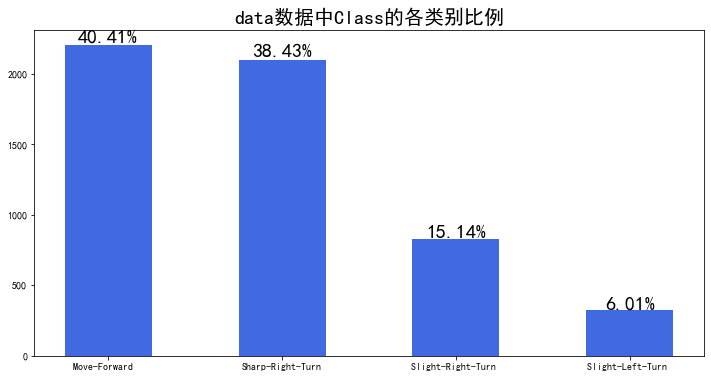

<Figure size 432x288 with 0 Axes>

In [9]:
# TODO：查看data数据中Class的各类别比例

# 导入依赖库
plt.rcParams['font.sans-serif'] = ['SimHei']

# assign data

Direction = ['Move-Forward  ','Sharp-Right-Turn','Slight-Right-Turn ','Slight-Left-Turn '] 
Numbers = [2205,2097,826,328]
Percentage = []
for i in range(len(Numbers)):
    Percentage.append(round((Numbers[i]/len(data))*100,2))
table = pd.DataFrame({'Direction':Direction,'Numbers':Numbers,'Percentage':Percentage})
print(table)

# depict illustration
plt.figure(figsize=(12,6))
graph = plt.bar(table.Direction,table.Numbers,width=0.5,color = 'royalblue')
plt.title('data数据中Class的各类别比例', fontsize = 20)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(table.Percentage[i])+'%',
             ha='center',
             weight='bold',fontsize = 20)
    i+=1
plt.show()
plt.savefig("data数据中Class的各类别比例", tight_layout=False)

### 编程练习
标签转换
- 将Class各类别转换为数字，其中Move-Forward转为1，Sharp-Right-Turn转为2，Slight-Right-Turn转为3，Slight-Left-Turn转为4

In [10]:
# TODO：按要求对data数据中Class进行标签转换
data['Class']  =data['Class'].map({'Move-Forward':1,'Sharp-Right-Turn':2,'Slight-Right-Turn':3,'Slight-Left-Turn': 4})
data

,US0,US1,US2,US3,US4,US5,US6,US7,US8,US9,...,US19,US20,US21,US22,US23,SD_front,SD_left,SD_right,SD_back,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.445,0.431,0.444,0.440,0.429,1.687,0.445,2.332,0.429,3
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.449,0.431,0.444,0.443,0.429,1.687,0.449,2.332,0.429,3
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.449,0.431,0.444,0.446,0.429,1.687,0.449,2.334,0.429,3
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.449,0.431,0.444,0.444,0.429,1.687,0.449,2.334,0.429,3
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.449,0.431,0.444,0.441,0.429,1.687,0.449,2.334,0.429,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,5.000,1.045,5.000,5.000,1.562,1.024,0.657,1.087,1.562,1
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,1.616,1.058,5.000,5.000,1.085,0.894,0.649,1.071,1.085,2
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,5.000,1.065,5.000,5.000,1.105,0.873,0.642,1.053,1.105,2
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,5.000,1.076,5.000,5.000,1.118,0.967,0.635,1.034,1.118,1


## 编程练习
使用describe函数查看data数据集中各列特征的分布
<br><br>
对结果使用转置可一次性展示

In [11]:
df = data.describe()
df

,US0,US1,US2,US3,US4,US5,US6,US7,US8,US9,...,US19,US20,US21,US22,US23,SD_front,SD_left,SD_right,SD_back,Class
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,1.076320,1.015923,1.778034,1.555045,1.578508,1.290307,0.681269,1.881819,1.273689,1.867485
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.141498,0.887439,1.571686,1.291447,1.150480,0.626700,0.342594,0.562533,0.821750,0.882376
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.355000,0.380000,0.370000,0.367000,0.377000,0.495000,0.340000,0.836000,0.367000,1.000000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.541750,0.567000,0.743000,0.792000,0.884000,0.826000,0.495000,1.472000,0.788000,1.000000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,0.693000,0.764000,1.030500,1.071000,1.289000,1.089500,0.612000,1.753000,1.066500,2.000000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,0.863000,1.002250,2.068250,1.559500,1.657250,1.519500,0.753000,2.139000,1.400500,2.000000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [12]:
df.T  #数组转置

,count,mean,std,min,25%,50%,75%,max
US0,5456.0,1.471617,0.802801,0.400,0.92100,1.3350,1.81400,5.000
US1,5456.0,2.327043,1.410146,0.437,1.36200,1.9045,2.68150,5.025
US2,5456.0,2.489347,1.247435,0.470,1.53875,2.0640,2.73925,5.029
US3,5456.0,2.796501,1.309368,0.833,1.73100,2.4580,4.09350,5.017
US4,5456.0,2.958552,1.339225,1.120,1.77400,2.6670,4.31450,5.000
US5,5456.0,2.893073,1.282575,1.114,1.78575,2.6825,3.83525,5.005
US6,5456.0,3.351113,1.413692,1.122,1.93075,3.2255,5.00000,5.008
US7,5456.0,2.540397,1.111554,0.859,1.61800,2.1720,3.19300,5.087
US8,5456.0,3.125621,1.356965,0.836,1.79975,2.8020,5.00000,5.000
US9,5456.0,2.832386,1.307843,0.810,1.63600,2.6790,3.52625,5.022


数值型特征个数： 29


<bound method Figure.tight_layout of <Figure size 1080x2160 with 59 Axes>>

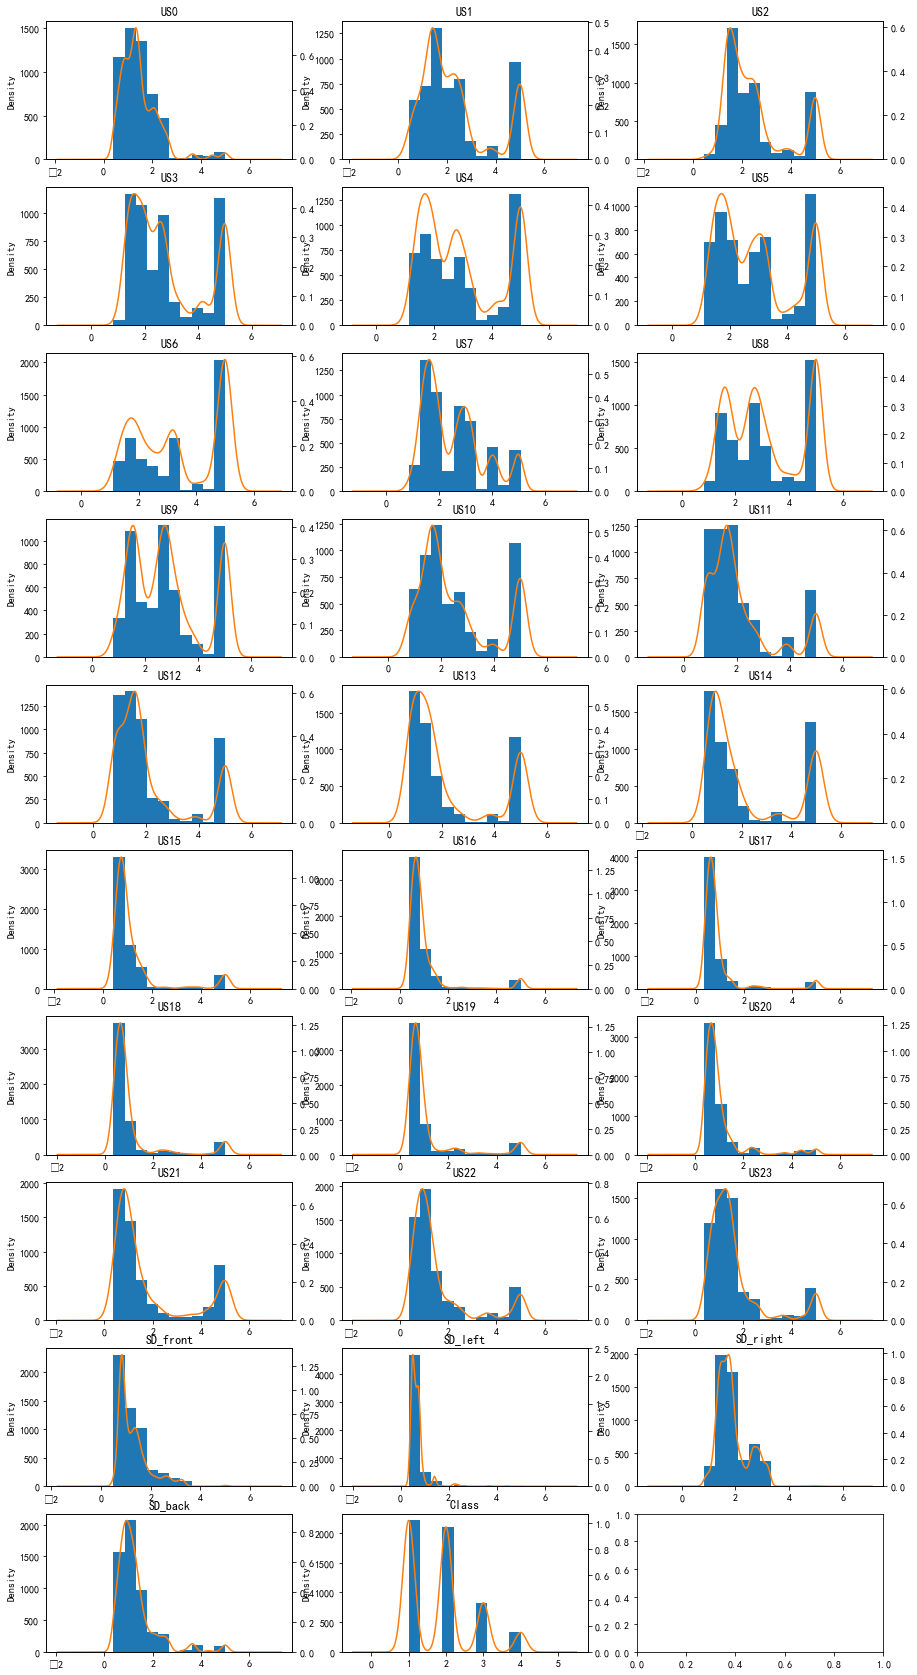

In [13]:
# TODO：画出特征分布的直方图

#提取出数值特征维度
numerical_features = data.columns#数值型特征

#绘制各个数值型特征的分布情况
#计算数值型特征的维度数，方便规划长宽比例
k = len(numerical_features)
print('数值型特征个数：',k)
n = 3 #每行三个
m = 10 #一共设置10行

#设置画布，规划图的个数排版
fig,axes = plt.subplots(m,n,figsize = (n*5,m*3))
for i in range(k):
    column = data[numerical_features].columns[i]
    r,c = i//n,i%n
    ax = axes[r,c]
    data[column].hist(ax = ax)#绘制分布直方图
    ax2 = data[column].plot.kde(ax = ax,secondary_y = True,title = column)#绘制kde图，共享y轴
    ax2.set_ylim(0)#限制y轴从0开始
fig.tight_layout#自动调整子图参数


## 3.特征工程
通过观察数据我们发现：

- 数据的量纲差距不大。
- 数据不存在重复和缺失。
- 特征均为连续值。

你觉得对于我们的问题，你觉得需要进行连续特征离散化么？

首先分离特征和标签，并划分训练集和测试集，命名为X_train，X_test，y_train，y_test

In [14]:
# TODO： 分离特征和标签，并按要求划分训练集和测试集

X=data.drop('Class', axis=1) #特征
y=data['Class'] #标签
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### 选做：连续特征的离散化
- 方法一：使用等距离散化的方法，将连续特征按固定间隔分组
- 方法二：使用等频离散化的方法，将连续特征按固定样本数分组
- 方法三：使用算法或统计指标离散化，如卡方值、决策树、聚类分析等

方法一示例<br>
函数一是equal_distance_cut，他记录数据集分成几份时的界值，data为数据集，bins为份数<br>
函数二是apply_on_train_and_test，他调用函数一记录训练集中的界值，并施加在训练集和测试集上进行分箱，并返回分箱后的训练集和测试集

In [15]:
# 方法一示例
def equal_distance_cut(data,bins):
    Cutpoint = {}
    for i in range(len(data.columns)):
        cut = (np.max(data.iloc[:,i])-np.min(data.iloc[:,i]))/bins
        Cutpointlist = []
        for j in range((bins-1)):
            cutpoint = np.min(data.iloc[:,i]) + (j+1)*cut
            Cutpointlist.append(cutpoint)
        Cutpoint[i] = Cutpointlist
    return Cutpoint
def apply_on_train_and_test(train, test, bins):
    Cutpoint = equal_distance_cut(train,10)
    train_set = pd.DataFrame(np.zeros_like(train),columns=train.columns,index=train.index)
    test_set = pd.DataFrame(np.zeros_like(test),columns=test.columns,index=test.index)
    for i in range(len(train.columns)):
        for j in range((bins-1)):
            train_set.iloc[:,i][train.iloc[:,i] > Cutpoint[i][j]]=j
    for i in range(len(test.columns)):
        for j in range((bins-1)):
            test_set.iloc[:,i][test.iloc[:,i] > Cutpoint[i][j]]=j
    return train_set, test_set
X_train_split_1, X_test_split_1 = apply_on_train_and_test(X_train, X_test, 10)                   

方法二示例<br>
函数equal_frequency_cut将数据排序后分成数份，train和test为数据集，bins为份数，并返回分箱后的训练集和测试集

In [16]:
# 方法二示例
def equal_frequency_cut(train, test, bins):
    train_set = train.copy()
    test_set = test.copy()
    edages = pd.Series([i/bins for i in range(bins)]) 
    for col in train.columns:
        train_set[col] = train_set[col].rank(pct=1).astype(float).apply(lambda x: (edages >= x).argmax())
    for col in test.columns:
        test_set[col] = test_set[col].rank(pct=1).astype(float).apply(lambda x: (edages >= x).argmax())
    return train_set, test_set
X_train_split_2, X_test_split_2 = equal_frequency_cut(X_train, X_test, 10) 

方法三示例：决策树实现特征分箱<br><br>
函数cut_bin对训练集进行分箱<br>
cut_bin参数说明<br>
    df：训练集名称，如train;  label：标签名称，如'Class';  max_depth：决策树最大深度;  percent：最小叶子节点数与样本量的比例<br>
cut_bin输出说明<br>
    df_bin：分箱后的数据集;  dict_bin：储存分箱参数的字典<br><br>
函数cut_test_bin对测试集进行分箱<br>
cut_test_bin参数说明<br>
    df：测试集名称，如test;  label：标签名称，如'Class';  train_dict_bin：训练集分箱生成的储存参数的字典<br>
cut_test_bin输出说明<br>
    df_bin：分箱后的数据集;  dict_bin：储存分箱参数的字典<br><br>
函数DT_cut将前两个函数施加在数据集上，参数分别为特征和标签的训练集名称、特征和标签的测试集名称，决策树最大深度和最小叶子节点数与样本量的比例，返回划分后的数据集

In [17]:
# 方法三示例
from sklearn.tree import DecisionTreeClassifier
def cut_bin(df,label,max_depth,p):
    df_bin = df[[label]]
    df_feature = df.drop([label],axis=1)
    dict_bin = {}
    for col in df_feature.columns:
        get_model = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=int(p*len(df)))
        get_cut_point = get_model.fit(df[col].values.reshape(-1,1),df[[label]].values.reshape(-1,1))
        cut_point = get_cut_point.tree_.threshold[get_cut_point.tree_.threshold!=-2]
        
        N_split = np.zeros_like(df[col])
        inter_range = []
        if len(cut_point)==1:
            N_split[np.array(df[col]<cut_point[0])]=1
            N_split[np.array(df[col]>=cut_point[0])]=2
            inter_range=[[1,-100000000,cut_point[0]],[2,cut_point[0],100000000]]
        elif len(cut_point)>1:
            cut_point.sort()
            N_split[np.array(df[col]<cut_point[0])]=1
            inter_range=[[1,-100000000,cut_point[0]]]
            for i in range(len(cut_point)-1):
                N_split[np.array((df[col]>=cut_point[i]) & (df[col]<cut_point[i+1]))]=i+2
                inter_range=inter_range+[[i+2,cut_point[i],cut_point[i+1]]]
            N_split[np.array(df[col]>=cut_point[len(cut_point)-1])]=len(cut_point)+1
            inter_range=inter_range+[[len(cut_point)+1,cut_point[len(cut_point)-1],100000000]]
        else:
            N_split=1
            inter_range=np.array([1,-100000000,100000000]).reshape(1,-1)
        df_bin[col] = N_split
        inter_df = pd.DataFrame(inter_range)
        inter_df.columns=['bin','lower','upper']
        dict_bin[col] = inter_df
    return df_bin, dict_bin

def cut_test_bin(df, label, train_dict_bin):
    df_bin = df[[label]]
    df_feature = df.drop([label],axis=1)
    dict_bin = {}
    for col in df_feature.columns:
        train_bin = train_dict_bin[col]
        splited = pd.Series([np.nan]*len(df[col]))
        for i in range(len(train_bin['bin'])):
            splited[((df[col]>=train_bin['lower'][i]) & (df[col]<train_bin['upper'][i])).tolist()]=train_bin['bin'][i]
            df_bin[col]=splited.tolist()
        inter_df = train_bin[['bin','lower','upper']]
        dict_bin[col] = inter_df
    return df_bin, dict_bin   

def DT_Cut(trainx,trainy,testx,testy,max_depth,percent):
    trainy = pd.DataFrame(trainy,columns=['Class'])
    testy = pd.DataFrame(testy,columns=['Class'])
    train = pd.concat([trainx,trainy],axis=1)
    test = pd.concat([testx,testy],axis=1)
    train_bin,train_dict_bin = cut_bin(train,'Class',5,0.1)
    test_bin,test_dict_bin = cut_test_bin(test,'Class',train_dict_bin)
    train_set = train_bin.drop('Class',axis=1)
    test_set = test_bin.drop('Class',axis=1)
    return train_set, test_set
X_train_split_3, X_test_split_3 = DT_Cut(X_train,y_train,X_test,y_test,5,0.1)

### 特征过滤

- 你可以选择在特征过滤前进行必要的数据规整

#### 思路1.使用PCA进行降维

In [18]:
# TODO： 对训练集和测试集使用PCA进行降维,注意应自行决定保留特征数目
from sklearn import decomposition
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
#实例化一下我们的PCA
pca = PCA()
#训练模型
pca.fit(X_train)

PCA()

In [20]:
#返回各自的方差贡献率
ratio = pca.explained_variance_ratio_
ratio

array([0.20007837, 0.14464017, 0.08336041, 0.07407937, 0.05529839,
       0.04901162, 0.04501152, 0.03847057, 0.0327839 , 0.02869436,
       0.02598627, 0.02487194, 0.02338611, 0.02055079, 0.01978167,
       0.01787466, 0.01701009, 0.01604516, 0.01491076, 0.01357423,
       0.01300715, 0.01051766, 0.00953833, 0.00938612, 0.00398244,
       0.003509  , 0.00298541, 0.00165349])

In [21]:
#计算一下累计贡献率
cum_ratio = ratio.cumsum()
cum_ratio

array([0.20007837, 0.34471854, 0.42807895, 0.50215832, 0.55745671,
       0.60646833, 0.65147986, 0.68995043, 0.72273433, 0.75142869,
       0.77741496, 0.8022869 , 0.82567301, 0.8462238 , 0.86600547,
       0.88388014, 0.90089023, 0.91693539, 0.93184616, 0.94542039,
       0.95842754, 0.9689452 , 0.97848354, 0.98786966, 0.9918521 ,
       0.9953611 , 0.99834651, 1.        ])

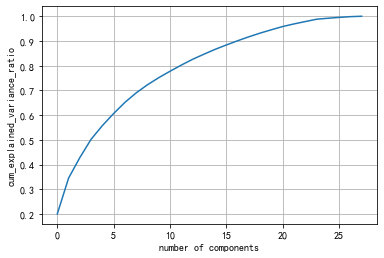

In [22]:
#画图展示
xs = []
for i in range(len(cum_ratio)):
    xs.append(i)
plt.plot(xs,cum_ratio)
plt.xlabel('number of components')
plt.ylabel('cum_explained_variance_ratio')
plt.grid()
plt.show()

当特征数目达到17时，累计贡献率达到90%，所以保留特征数目 = 17

In [23]:
#创建PCA对象，n_components=17
pca = decomposition.PCA(n_components=17)

#使用PCA对特征进行降维
X_train_pca = pca.fit_transform(X_train)
X_train_pca

array([[ 6.14314477, -1.31984901,  1.47099441, ...,  0.02813598,
        -1.24400371, -1.76519239],
       [ 3.64664032, -2.22452828,  1.48727949, ...,  1.74407641,
         1.02951483,  3.33101568],
       [-1.2685829 , -2.92989744, -0.27084287, ..., -0.30547381,
         0.40838219,  0.07481503],
       ...,
       [ 0.5893689 ,  3.78436194, -0.05412419, ..., -0.50391413,
        -0.49391162, -0.47094156],
       [ 0.04796966, -3.03582375, -1.85449039, ..., -1.09108311,
        -0.1137655 , -0.52005497],
       [ 0.42493725, -0.95745205,  0.48307473, ...,  0.94251932,
        -0.94837674, -0.30122774]])

In [24]:
#查看降维后特征的维度
X_train_pca.shape

(4364, 17)

In [25]:
#使用PCA对测试集进行降维
X_test_pca = pca.fit_transform(X_test)
X_test_pca.shape

(1092, 17)

#### 思路2.使用任何一种方法进行特征选择

In [26]:
# TODO：使用一种方法进行特征选择，此处以随机森林作为示例
# 注意自行调整保留特征个数
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=20,max_depth=10,n_estimators=1024,n_jobs=-1,random_state=0)
rf.fit(X_train,y_train)
imp = np.argsort(rf.feature_importances_)[::-1]
imp_slct = imp[:25]
X_train_slct=pd.DataFrame(X_train).iloc[:,imp_slct]
X_test_slct=pd.DataFrame(X_test).iloc[:,imp_slct]

In [27]:
imp

array([24, 25, 14, 18, 17, 19, 13, 27, 11, 12, 23, 20, 10, 16, 22,  9,  6,
        7,  1,  0,  3, 26,  2, 15,  5,  8,  4, 21], dtype=int64)

In [28]:
# 将特征的重要性程度进行排序
indices=np.argsort(imp)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], imp[indices[f]]))

 1) US7                            27.000000
 2) US21                           26.000000
 3) US1                            25.000000
 4) US0                            24.000000
 5) US10                           23.000000
 6) US14                           22.000000
 7) SD_back                        21.000000
 8) US11                           20.000000
 9) US5                            19.000000
10) US3                            18.000000
11) US4                            17.000000
12) US13                           16.000000
13) US23                           15.000000
14) US2                            14.000000
15) US6                            13.000000
16) US9                            12.000000
17) US8                            11.000000
18) US12                           10.000000
19) US15                           9.000000
20) SD_left                        8.000000
21) US17                           7.000000
22) US16                           6.000000
23) SD_front  

In [29]:
importance = []
feature = []
for f in range(0,28):
    importance.append(imp[indices[f]])
    feature.append(X_train.columns[indices[f]])

In [30]:
importance[:25]

[27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3]

In [31]:
feature[:25]

['US7',
 'US21',
 'US1',
 'US0',
 'US10',
 'US14',
 'SD_back',
 'US11',
 'US5',
 'US3',
 'US4',
 'US13',
 'US23',
 'US2',
 'US6',
 'US9',
 'US8',
 'US12',
 'US15',
 'SD_left',
 'US17',
 'US16',
 'SD_front',
 'SD_right',
 'US20']

In [32]:

data = pd.DataFrame({'Features':feature[:25],'Importance':importance[:25]})
data

,Features,Importance
0,US7,27
1,US21,26
2,US1,25
3,US0,24
4,US10,23
5,US14,22
6,SD_back,21
7,US11,20
8,US5,19
9,US3,18


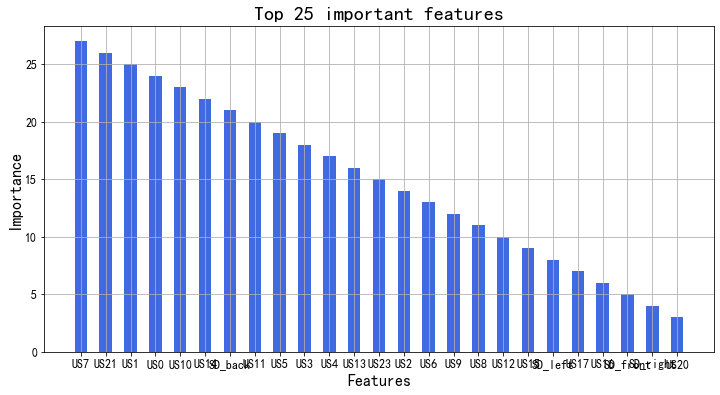

In [33]:
plt.figure(figsize=(12,6))

plt.bar(data.Features,data.Importance,width=0.5,color='royalblue')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 25 important features',fontsize=20)
plt.grid()
plt.show()

In [34]:
X_train_slct

,SD_front,SD_left,US14,US18,US17,US19,US13,SD_back,US11,US12,...,US9,US6,US7,US1,US0,US3,SD_right,US2,US15,US5
2835,0.808,0.581,1.077,0.581,0.585,0.600,0.819,5.000,0.825,0.808,...,5.000,2.818,1.676,1.311,1.300,4.759,1.651,4.738,1.078,2.827
3715,0.779,0.562,0.789,0.568,0.588,0.562,0.779,5.000,0.807,0.788,...,1.653,2.933,2.420,1.331,1.340,4.765,2.392,1.345,0.810,5.000
3359,0.797,0.756,0.797,1.137,0.756,1.129,1.608,0.709,1.554,1.578,...,1.557,5.000,5.000,0.776,0.753,2.748,2.913,2.049,0.771,5.000
3323,0.785,0.747,0.795,0.754,0.773,0.747,0.785,0.812,0.814,0.792,...,1.542,1.522,1.502,2.870,2.733,5.000,1.502,5.000,0.815,1.545
1193,1.070,0.904,1.070,1.058,0.904,0.904,5.000,5.000,3.869,1.437,...,3.074,3.884,4.184,2.338,2.144,2.342,2.394,2.327,0.653,3.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.761,0.851,0.761,1.047,1.125,0.851,5.000,0.663,2.595,1.618,...,1.569,5.000,5.000,0.743,0.696,2.739,5.000,2.027,0.745,5.000
4821,0.591,0.775,0.591,0.800,0.789,0.775,1.037,1.182,1.078,1.059,...,3.148,3.241,2.911,2.370,2.139,5.000,2.372,5.000,0.957,2.372
4415,2.049,0.462,3.760,5.000,1.480,0.462,2.079,1.652,2.049,2.061,...,2.488,2.014,1.994,1.679,1.659,2.670,1.937,2.637,1.723,1.937
1365,1.360,0.425,1.360,0.425,0.434,0.435,1.579,1.177,1.587,1.575,...,2.985,5.000,1.698,2.420,1.191,3.395,1.698,5.000,1.711,4.322


In [35]:
X_test_slct

,SD_front,SD_left,US14,US18,US17,US19,US13,SD_back,US11,US12,...,US9,US6,US7,US1,US0,US3,SD_right,US2,US15,US5
4413,2.074,0.457,3.784,3.120,5.000,0.457,2.105,1.626,2.074,2.109,...,2.503,2.018,1.989,1.653,1.634,2.654,1.932,1.691,1.726,1.932
4377,2.431,0.479,5.000,0.511,0.479,0.519,5.000,1.276,2.435,2.990,...,2.721,5.000,1.861,1.352,1.320,1.827,1.816,1.569,5.000,1.833
741,1.877,0.463,1.877,0.548,0.463,0.701,5.000,1.448,2.273,2.569,...,2.255,5.000,1.906,1.509,1.476,1.856,1.849,2.445,5.000,1.858
2905,0.867,0.653,0.867,0.847,0.653,0.701,1.376,0.817,2.096,1.379,...,5.000,5.000,4.064,0.872,0.846,1.458,1.458,1.446,0.659,5.000
5427,0.926,0.789,0.926,0.816,0.789,0.868,1.211,0.716,1.361,1.506,...,1.363,2.521,1.411,3.651,4.414,2.664,1.389,5.000,0.789,2.654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,1.182,0.572,3.421,0.588,0.572,0.612,1.182,0.722,2.174,1.967,...,2.880,5.000,3.411,0.804,0.781,2.900,2.837,1.563,0.606,2.837
1950,1.415,0.644,1.440,0.665,0.644,0.795,1.415,0.756,2.161,1.728,...,5.000,5.000,4.111,5.000,0.776,1.421,1.467,1.412,0.664,1.488
4702,1.171,0.576,5.000,0.594,0.576,0.618,1.171,1.017,1.909,1.839,...,5.000,5.000,4.017,1.064,1.030,1.635,1.597,1.625,0.625,3.128
2199,2.427,0.630,3.588,0.639,0.630,3.117,5.000,1.058,2.427,2.439,...,3.022,5.000,2.043,1.266,1.236,2.718,2.043,1.315,5.000,2.778


考虑将PCA降维后的数据与随机森林模型所筛选出来的数据结合作为新的数据集

In [36]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

list_train = []
for i in range(4364):
    list_train.append(i)

list_test = []
for i in range(1092):
    list_test.append(i)

X_train_slct.index = list_train
X_train_pca.index = list_train

X_test_slct.index = list_test
X_test_pca.index = list_test

X_train_combined = X_train_pca.join(X_train_slct)
X_test_combined = X_test_pca.join(X_test_slct)

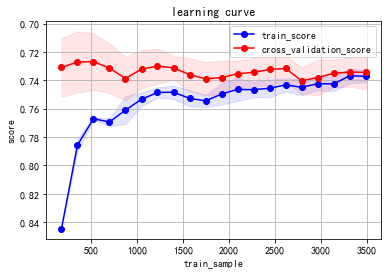

(0.7320244765830477, 0.01916161929053739)

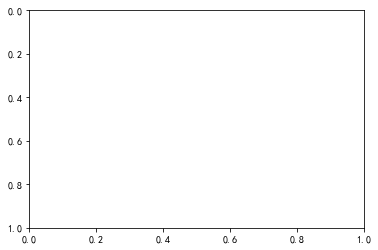

In [37]:
#查看得到的新数据集是否过拟合

from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import learning_curve #c查看是否过拟合

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train_sample")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train_score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross_validation_score")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
        plt.savefig("learn_curve.jpg") 

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
if __name__=='__main__':
    X= X_train_combined
       
y= y_train

Gmodel=GaussianNB()
train_sizes, train_scores, test_scores=learning_curve(Gmodel,X,y,train_sizes=[3,6,10],cv=3)
plot_learning_curve(Gmodel, u"learning curve", X, y)

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

#使用带L2惩罚性的决策树作为及础模型的特征选择
xs = SelectFromModel(DecisionTreeClassifier()).fit_transform(X_train,y_train)
xs

array([[0.808, 0.581],
       [0.779, 0.562],
       [0.797, 0.756],
       ...,
       [2.049, 0.462],
       [1.36 , 0.425],
       [0.784, 0.389]])

In [39]:
#训练决策树看结果
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
#查看下我们的模型的特征重要性评估
importances = dt.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.53652521,
       0.46347479, 0.        , 0.        ])

In [41]:
# 将特征的重要性程度进行排序
importances=dt.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], importances[indices[f]]))

 1) SD_front                       0.536525
 2) SD_left                        0.463475
 3) SD_back                        0.000000
 4) US12                           0.000000
 5) US1                            0.000000
 6) US2                            0.000000
 7) US3                            0.000000
 8) US4                            0.000000
 9) US5                            0.000000
10) US6                            0.000000
11) US7                            0.000000
12) US8                            0.000000
13) US9                            0.000000
14) US10                           0.000000
15) US11                           0.000000
16) US13                           0.000000
17) SD_right                       0.000000
18) US14                           0.000000
19) US15                           0.000000
20) US16                           0.000000
21) US17                           0.000000
22) US18                           0.000000
23) US19                        

In [42]:
threshold=0.01
feature_selected=X_train.columns[importances>threshold] #选择出来的特征
dt_train=X_train[feature_selected] 
dt_test=X_test[feature_selected]

In [43]:
dt_train

,SD_front,SD_left
2835,0.808,0.581
3715,0.779,0.562
3359,0.797,0.756
3323,0.785,0.747
1193,1.070,0.904
...,...,...
550,0.761,0.851
4821,0.591,0.775
4415,2.049,0.462
1365,1.360,0.425


In [44]:
dt_test

,SD_front,SD_left
4413,2.074,0.457
4377,2.431,0.479
741,1.877,0.463
2905,0.867,0.653
5427,0.926,0.789
...,...,...
2212,1.182,0.572
1950,1.415,0.644
4702,1.171,0.576
2199,2.427,0.630


---
## 4. 选择模型进行交叉验证和网格搜索

请使用上课的方法，选择合适的模型以及评估方式，使用交叉验证和网格搜索建立模型，并选择合适的参数,打印出交叉验证的结果。

- 你应该使用分类模型。
- 注意模型对数据规整的需求。

In [45]:
## TODO：模型选择、交叉验证、网格搜索
clf_model = None

这里以pca降维后的数据拟合随机森林模型作为演示，注意学习多分类模型的评价！

In [46]:
# 这里演示最简单的模型更多的模型选择和参数调整将由你们自己完成
# 分类模型
from sklearn.ensemble import RandomForestClassifier
clf_model = RandomForestClassifier(max_features=9,max_depth=16,n_estimators=2048,n_jobs=-1,random_state=0)
clf_model.fit(X_train_combined,y_train)

RandomForestClassifier(max_depth=16, max_features=9, n_estimators=2048,
                       n_jobs=-1, random_state=0)

In [103]:
# 随机森林分类模型测试集上效果
# auc和混淆矩阵评估

from sklearn.metrics import roc_auc_score, accuracy_score
print('随机森林模型：')
y_test_pred_clf_rf = clf_model.predict_proba(X_test_combined)
y_test_pred_rf = clf_model.predict(X_test_combined)

# 对标签one-hot编码后使用宏方法计算auc和acc，你也可以使用微方法
print('Random forest model auc score {:.6f}'.format(roc_auc_score(pd.get_dummies(y_test),y_test_pred_clf_rf,average='macro')))

print('---------------')
print('Random forest model accuracy score {:.6f}'.format(accuracy_score(y_test,y_test_pred_rf)))
acc_rf = accuracy_score(y_test,y_test_pred_rf)


print('\n随机模型：')
# 随机猜测函数对比
y_test_random_clf = np.random.uniform(low=0.0,high=1.0,size=(len(y_test),4))
y_test_random_pred = np.argmax(y_test_random_clf,axis=1)
print('random model auc score {:.6f}'.format(roc_auc_score(pd.get_dummies(y_test),y_test_random_clf,average='macro')))
print('---------------')
print('random model accuracy score {:.6f}'.format(accuracy_score(y_test,y_test_random_pred)))
acc_random = accuracy_score(y_test,y_test_random_pred)

随机森林模型：
Random forest model auc score 1.000000
---------------
Random forest model accuracy score 0.999084

随机模型：
random model auc score 0.492629
---------------
random model accuracy score 0.228938


In [48]:
#使用PCA降维后的训练集带入决策树分类模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier(random_state=0)
parameters={"criterion":["gini","entropy"]
            ,"splitter":["best","random"]
            ,"max_depth":[*range(1,10)]
            ,"min_samples_leaf":[*range(1,10)]
            }
GS=GridSearchCV(clf,cv=10,param_grid=parameters)
#网格搜索包括交叉验证
gs=GS.fit(X_train_pca,y_train)
bestchoice=gs.best_params_
#最佳组合，（不一定最好，可能有些参数不涉及结果更好）
bestscore=gs.best_score_
print(bestchoice)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'splitter': 'best'}


In [49]:
dt_model = DecisionTreeClassifier(max_depth= 9, min_samples_leaf=1)
dt_model.fit(X_train_combined,y_train)

DecisionTreeClassifier(max_depth=9)

In [50]:
# 分类模型测试集上效果
# auc和混淆矩阵评估

from sklearn.metrics import roc_auc_score, accuracy_score

print('决策树模型：')
y_test_pred_clf_dt = dt_model.predict_proba(X_test_combined)
y_test_pred_dt = dt_model.predict(X_test_combined)

# 对标签one-hot编码后使用宏方法计算auc和acc，你也可以使用微方法
print('Decision tree auc score {:.6f}'.format(roc_auc_score(pd.get_dummies(y_test),y_test_pred_clf_dt,average='macro')))

print('---------------')
print('Decision tree accuracy score {:.6f}'.format(accuracy_score(y_test,y_test_pred_dt)))
acc_dt = accuracy_score(y_test,y_test_pred_dt)

决策树模型：
Decision tree auc score 1.000000
---------------
Decision tree accuracy score 1.000000


---
## 5. 模型集成
尝试使用stacking等方法对步骤四生成的不同学习器进行集成。

注意评价集成后的模型。

In [76]:
# TODO:模型集成
ensemble_model_clf = None


In [87]:
from sklearn.model_selection import KFold
def get_stacking(clf, x_train, y_train, x_test, n_folds=10):
    """
    这个函数是stacking的核心，使用交叉验证的方法得到次级训练集
    x_train, y_train, x_test 的值应该为numpy里面的数组类型 numpy.ndarray .
    如果输入为pandas的DataFrame类型则会把报错
   """
    #计算训练集和测试集的样本数
    train_num, test_num = x_train.shape[0], x_test.shape[0]
    #存储结果
    second_level_train_set = np.zeros((train_num,))
    second_level_test_set = np.zeros((test_num,))
    test_nfolds_sets = np.zeros((test_num, n_folds))
    #K折交叉验证
    kf = KFold(n_splits=n_folds)
    #依次使用K折数据集训练数据
    for i,(train_index, test_index) in enumerate(kf.split(x_train)):
        #切分K折数据
        x_tra, y_tra = x_train[train_index], y_train[train_index]
        x_tst, y_tst =  x_train[test_index], y_train[test_index]
        #训练数据
        clf.fit(x_tra, y_tra)
        #对训练集和测试集进行预测
        second_level_train_set[test_index] = clf.predict(x_tst)
        test_nfolds_sets[:,i] = clf.predict(x_test)
    #计算返回的均值
    second_level_test_set[:] = test_nfolds_sets.mean(axis=1)
    return second_level_train_set, second_level_test_set

In [88]:
#需要融合的模型有哪些呢
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

In [89]:
X_train_combined = np.array(X_train_combined)
y_train = np.array(y_train)
X_test_combined = np.array(X_test_combined)

In [90]:
#存储新特征的列表
train_sets = []
test_sets = []
for clf in [rf_model,dt_model]:
    train_set,test_set = get_stacking(clf,X_train_combined, y_train, X_test_combined, n_folds=10)
    train_sets.append(train_set)
    test_sets.append(test_set)

In [91]:
meta_train = np.concatenate([result_set.reshape(-1,1) for result_set in train_sets],axis = 1)
meta_test = np.concatenate([result_set.reshape(-1,1) for result_set in test_sets],axis = 1)

In [92]:
from sklearn.tree import DecisionTreeClassifier
#弱学习器作为整合融合模型
dt_clf = DecisionTreeClassifier(max_depth = 3)
dt_clf.fit(meta_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [93]:
dt_predict_train = dt_clf.predict(meta_train)
dt_predict_test = dt_clf.predict(meta_test)

In [95]:
print('stacking：')
y_test_pred_clf_stacking = dt_clf.predict_proba(meta_test)
y_test_pred_stacking = dt_clf.predict(meta_test)

# 对标签one-hot编码后使用宏方法计算auc和acc，你也可以使用微方法
print('stacking auc score {:.6f}'.format(roc_auc_score(pd.get_dummies(y_test),y_test_pred_clf_stacking,average='macro')))

print('---------------')
print('stacking accuracy score {:.6f}'.format(accuracy_score(y_test,y_test_pred_stacking)))
acc_stacking = accuracy_score(y_test,y_test_pred_stacking)

stacking：
stacking auc score 1.000000
---------------
stacking accuracy score 1.000000


In [ ]:
acc_stacking

In [62]:
#看下我们的准确率
from sklearn.metrics import accuracy_score

#训练集准确率
accuracy_score(y_train,dt_predict_train)

0.9997708524289642

In [63]:
#测试集准确率
accuracy_score(dt_predict_test,y_test)

1.0

In [64]:
#看下混淆矩阵
from sklearn.metrics import confusion_matrix

#训练集混淆矩阵
cm1 = confusion_matrix(dt_predict_train,y_train)
cm1

array([[1760,    0,    0,    1],
       [   0, 1681,    0,    0],
       [   0,    0,  662,    0],
       [   0,    0,    0,  260]], dtype=int64)

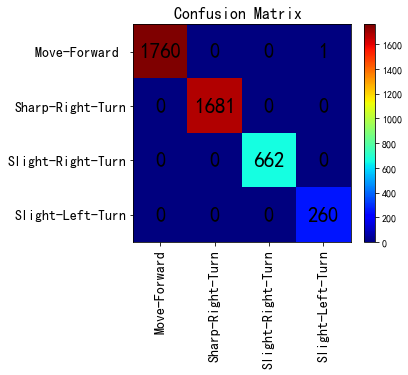

In [65]:
import pandas as pd

import matplotlib.pyplot as plt

confusion_matrix = {'Move-Forward ':{'Move-Forward': cm1[0][0], 'Sharp-Right-Turn': cm1[0][1], 'Slight-Right-Turn': cm1[0][2], 'Slight-Left-Turn':cm1[0][3] }, 
                    'Sharp-Right-Turn':{'Move-Forward': cm1[1][0], 'Sharp-Right-Turn': cm1[1][1], 'Slight-Right-Turn': cm1[1][2], 'Slight-Left-Turn':cm1[1][3] },
                    'Slight-Right-Turn':{'Move-Forward': cm1[2][0], 'Sharp-Right-Turn': cm1[2][1], 'Slight-Right-Turn': cm1[2][2], 'Slight-Left-Turn':cm1[2][3] },
                    'Slight-Left-Turn':{'Move-Forward': cm1[3][0], 'Sharp-Right-Turn': cm1[3][1], 'Slight-Right-Turn': cm1[3][2], 'Slight-Left-Turn':cm1[3][3] }}
pd_cm = pd.DataFrame(confusion_matrix).T.fillna(0)

row_keys = pd_cm.index.values.tolist()
col_keys = pd_cm.columns.values.tolist()
fig = plt.figure()
plt.clf()
axes = fig.add_subplot(111)
axes.set_aspect(1)
res = axes.imshow(pd_cm, cmap=plt.cm.jet, interpolation='nearest')
array_list = pd_cm.values.tolist()
for x in range(len(row_keys)):
    for y in range(len(col_keys)):
        axes.annotate(str(array_list[x][y]), xy=(y, x),
        horizontalalignment='center',
        verticalalignment='center',fontsize=21)
fig.colorbar(res, fraction=0.046, pad=0.04)
plt.xticks(range(len(col_keys)), col_keys, fontsize=14, rotation=90)
plt.yticks(range(len(row_keys)), row_keys, fontsize=14, rotation=0)
plt.title('Confusion Matrix ', fontsize = 16)
plt.savefig("confusion_matrix.png", tight_layout=False)

In [66]:
pd_cm

,Move-Forward,Sharp-Right-Turn,Slight-Right-Turn,Slight-Left-Turn
Move-Forward,1760,0,0,1
Sharp-Right-Turn,0,1681,0,0
Slight-Right-Turn,0,0,662,0
Slight-Left-Turn,0,0,0,260


通过混淆矩阵，我们可以得到如下结论

Accuracy

In [67]:
#计算机器人运动的总数量
col_sum = np.sum(cm1, axis=1)  # 按行求和
print('机器人运动的总数量:'+ str(col_sum.sum()))
#计算预测正确的机器人运动的数量
diag_sum=cm1[0][0]+cm1[1][1]+cm1[2][2]+cm1[3][3]
print('预测正确的机器人运动的数量:'+ str(diag_sum))
#计算准确率Accuracy
print('准确率(Accuracy):'+ str(diag_sum/col_sum.sum()))

机器人运动的总数量:4364
预测正确的机器人运动的数量:4363
准确率(Accuracy):0.9997708524289642


通过绘制折线图，比较以上各个模型在训练集上的准确率

In [105]:
import matplotlib.pyplot as plt
acc = [acc_random,acc_rf,acc_dt,acc_stacking]
model = ['Random model','Random forest','Decision tree','stacking']
data = pd.DataFrame({'Accuracy':acc,'Model':model})
data

,Accuracy,Model
0,0.228938,Random model
1,0.999084,Random forest
2,1.000000,Decision tree
3,1.000000,stacking


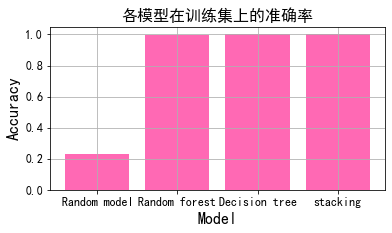

In [106]:
plt.figure(figsize=(6,3))

plt.bar(data.Model,data.Accuracy,color='hotpink')
plt.xlabel('Model',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('各模型在训练集上的准确率',fontsize=16)
plt.grid()
plt.show()

In [97]:
import matplotlib.pyplot as plt
AUC = [0.499629,1.000000,1.000000,1.000000]
model = ['Random model','Random forest','Decision tree','stacking']
data = pd.DataFrame({'Accuracy':AUC,'Model':model})
data

,Accuracy,Model
0,0.499629,Random model
1,1.000000,Random forest
2,1.000000,Decision tree
3,1.000000,stacking


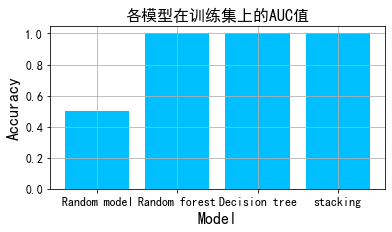

In [102]:
plt.figure(figsize=(6,3))

plt.bar(data.Model,data.Accuracy,color='deepskyblue')
plt.xlabel('Model',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('各模型在训练集上的AUC值',fontsize=16)
plt.grid()
plt.show()

---
## 6. 模型评价的深入思考<br>

对于多分类模型，我们需要逐类查看预测效果，以下给出示范代码，注意修改代码以评价自己的模型。<br>
<br>
- 示范代码中将所有类别的ROC曲线分别呈现，你也可以修改代码将他们在一张图上呈现

In [ ]:
# 评价分类模型在测试集上预测各类别的效果
# 计算各类别fpr和tpr
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(pd.get_dummies(y_test).iloc[:, i], y_test_pred_clf_stacking[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# 将4类的ROC曲线在4张子图呈现
from itertools import cycle
# Plot all ROC curves
lw=2
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
names = ['Move-Forward','Sharp-Right-Turn','Slight-Right-Turn','Slight-Left-Turn']
fig = plt.figure(figsize=(10,10))
for i, color in zip(range(4), colors):
    axe = fig.add_subplot(2,2,i+1)
    axe.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+names[i])
    plt.legend(loc="lower right")
plt.show()

In [ ]:
# 评价分类模型在测试集上预测各类别的效果
# 计算各类别fpr和tpr
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(pd.get_dummies(y_test).iloc[:, i], y_test_pred_clf_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# 将4类的ROC曲线在4张子图呈现
from itertools import cycle
# Plot all ROC curves
lw=2
plt.figure()
colors = cycle(['yellow', 'cornflowerblue', 'green','red'])
names = ['Move-Forward','Sharp-Right-Turn','Slight-Right-Turn','Slight-Left-Turn']
fig = plt.figure(figsize=(10,10))
for i, color in zip(range(4), colors):
    axe = fig.add_subplot(2,2,i+1)
    axe.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+names[i])
    plt.legend(loc="lower right")
plt.show()

In [ ]:
# 评价分类模型在测试集上预测各类别的效果
# 计算各类别fpr和tpr
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(pd.get_dummies(y_test).iloc[:, i], y_test_pred_clf_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# 将4类的ROC曲线在4张子图呈现
from itertools import cycle
# Plot all ROC curves
lw=2
plt.figure()
colors = cycle(['pink', 'darkorange', 'cornflowerblue','red'])
names = ['Move-Forward','Sharp-Right-Turn','Slight-Right-Turn','Slight-Left-Turn']
fig = plt.figure(figsize=(10,10))
for i, color in zip(range(4), colors):
    axe = fig.add_subplot(2,2,i+1)
    axe.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+names[i])
    plt.legend(loc="lower right")
plt.show()

In [ ]:
# 评价分类模型在测试集上预测各类别的效果
# 计算各类别fpr和tpr
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(pd.get_dummies(y_test).iloc[:, i], y_test_random_clf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# 将4类的ROC曲线在4张子图呈现
from itertools import cycle
# Plot all ROC curves
lw=2
plt.figure()
colors = cycle(['pink', 'darkorange', 'cornflowerblue','red'])
names = ['Move-Forward','Sharp-Right-Turn','Slight-Right-Turn','Slight-Left-Turn']
fig = plt.figure(figsize=(10,10))
for i, color in zip(range(4), colors):
    axe = fig.add_subplot(2,2,i+1)
    axe.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+names[i])
    plt.legend(loc="lower right")
plt.show()

In [ ]:
Models = ['随机模型','随机森林','决策树模型','Stacking']
acc = [acc_random,acc_rf,acc_dt,acc_stacking]
data = pd.DataFrame({'Model':Models,'Accuracy':acc})
data

In [ ]:
plt.figure(figsize=(6,3))

plt.plot(data.Model,data.Accuracy,color='r',linewidth=2,marker='o',markersize=5)
plt.xlabel('Model',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('四种模型的准确率',fontsize=20)
plt.grid()
plt.show()